C:\Users\my475\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,
C:\Users\my475\anaconda3\Lib\site-packages\pyvista\examples\downloads.py:98: UserWarning: Unable to access C:\Users\my475\AppData\Local\pyvista_3\pyvista_3\Cache. Manually specify the PyVistaexamples cache with the PYVISTA_USERDATA_PATH environment variable.
  warnings.warn(
C:\Users\my475\anaconda3\Lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\my475\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


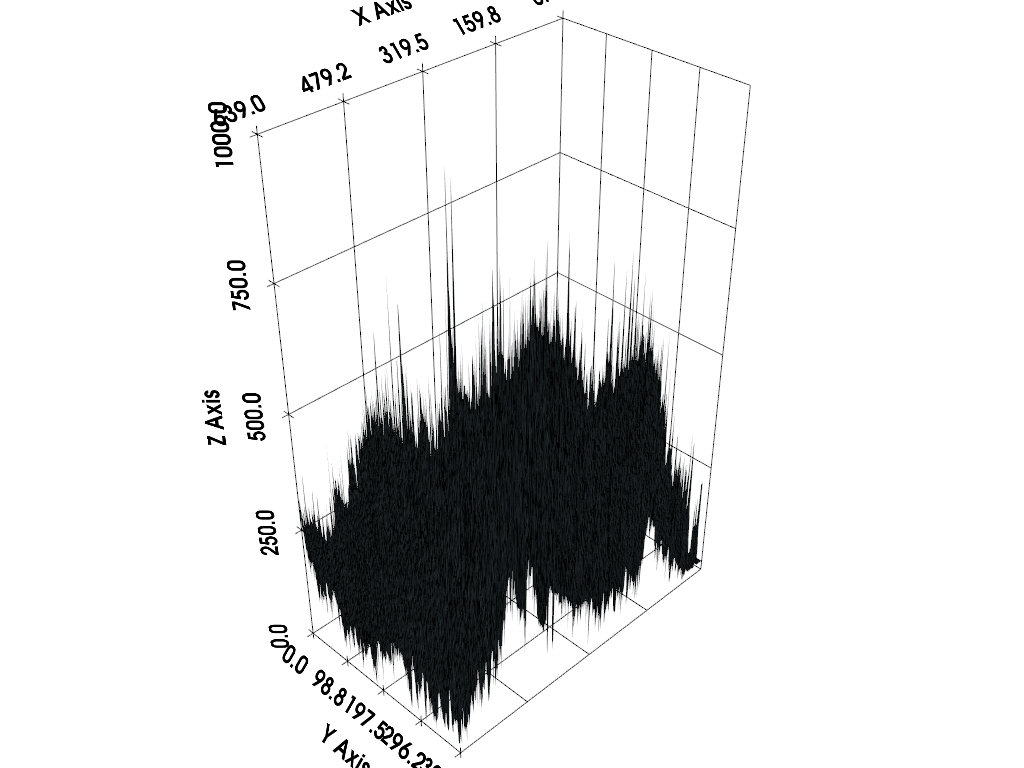

In [1]:
import numpy as np
import rasterio
import pyvista as pv
from pyvista import examples

# Load DEM data (Digital Elevation Model)
def load_dem(dem_path):
    with rasterio.open(dem_path) as dem_file:
        dem_data = dem_file.read(1)  # Read the first band (elevation data)
        transform = dem_file.transform
    return dem_data, transform

# Create 3D elevation model
def create_3d_elevation_model(dem_data, transform):
    # Get DEM dimensions
    rows, cols = dem_data.shape
    
    # Generate X, Y coordinates from DEM transform
    x = np.arange(cols) * transform[0] + transform[2]
    y = np.arange(rows) * transform[4] + transform[5]
    
    # Create a grid of X and Y coordinates
    X, Y = np.meshgrid(x, y)
    
    # Scale the elevation for better visualization
    Z = dem_data / np.max(dem_data) * 1000  # Scale elevations to enhance 3D effect
    
    # Create a PyVista mesh for 3D plotting
    grid = pv.StructuredGrid(X, Y, Z)
    return grid

# Plot the 3D model using PyVista
def plot_3d_model(grid):
    plotter = pv.Plotter()
    plotter.add_mesh(grid, cmap='terrain', show_edges=True)
    plotter.show_grid()
    plotter.view_isometric()
    
    plotter.show()

# Path to your DEM file
dem_path = "/Users/my475/OneDrive/Pictures/DEM/1.tif"  # Replace with your DEM file path

# Load DEM data
dem_data, transform = load_dem(dem_path)

# Create 3D elevation model
elevation_model = create_3d_elevation_model(dem_data, transform)

# Plot the 3D model
plot_3d_model(elevation_model)


In [3]:
import numpy as np
import rasterio
import pyvista as pv
from pyvista import examples

# Load DEM data (Digital Elevation Model)
def load_dem(dem_path):
    with rasterio.open(dem_path) as dem_file:
        dem_data = dem_file.read(1)  # Read the first band (elevation data)
        transform = dem_file.transform
    return dem_data, transform

# Create 3D elevation model
def create_3d_elevation_model(dem_data, transform):
    # Get DEM dimensions
    rows, cols = dem_data.shape
    
    # Generate X, Y coordinates from DEM transform
    x = np.arange(cols) * transform[0] + transform[2]
    y = np.arange(rows) * transform[4] + transform[5]
    
    # Create a grid of X and Y coordinates
    X, Y = np.meshgrid(x, y)
    
    # Scale the elevation for better visualization
    Z = dem_data / np.max(dem_data) * 1000  # Scale elevations to enhance 3D effect
    
    # Create a PyVista mesh for 3D plotting
    grid = pv.StructuredGrid(X, Y, Z)
    return grid

# Plot and save the 3D model as an image
def save_3d_model(grid, output_image_path):
    plotter = pv.Plotter()
    plotter.add_mesh(grid, cmap='terrain', show_edges=True)
    plotter.show_grid()
    plotter.view_isometric()
    
    # Save the plot as an image
    plotter.screenshot(output_image_path)
    print(f"3D image saved at: {output_image_path}")
    plotter.close()

# Path to your DEM file
dem_path ="/Users/my475/OneDrive/Pictures/DEM/1.tif"  # Replace with your DEM file path

# Load DEM data
dem_data, transform = load_dem(dem_path)

# Create 3D elevation model
elevation_model = create_3d_elevation_model(dem_data, transform)

# Save the 3D model as an image
output_image_path = "lunar_elevation_3d.png"  # Specify the output file name
save_3d_model(elevation_model, output_image_path)


C:\Users\my475\anaconda3\Lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


3D image saved at: lunar_elevation_3d.png
